In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load image và convert sang image gray
im = cv2.imread("./car/IMG_0392.jpg")
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
# lọc nhiễu bằng bilateralFilter mục đích lọc này là làm tăng strengt cho edge trên image
noise_removal = cv2.bilateralFilter(im_gray,9,75,75)
# Cân bằng lại histogram của ảnh 
equal_histogram = cv2.equalizeHist(noise_removal)
#  Morphogoly open mục đích là làm tăng dilation của edge và giảm edge nhiễu
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel1,iterations=20)
# subtract image
sub_morp_image = cv2.subtract(equal_histogram,morph_image)
# dùng threshold OSTU
ret,thresh_image = cv2.threshold(sub_morp_image,0,255,cv2.THRESH_OTSU)
# Dùng canny
canny_image = cv2.Canny(thresh_image,250,255)
# dilation
kernel2= np.ones((3,3), np.uint8)
dilated_image = cv2.dilate(canny_image,kernel2)
#
new,contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours= sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None
for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.06 * peri, True) 
    if len(approx) == 4:
            screenCnt = approx
            break
#final = cv2.drawContours(im, [screenCnt], -1, (0, 255, 0), 3)

(-0.5, 799.5, 599.5, -0.5)

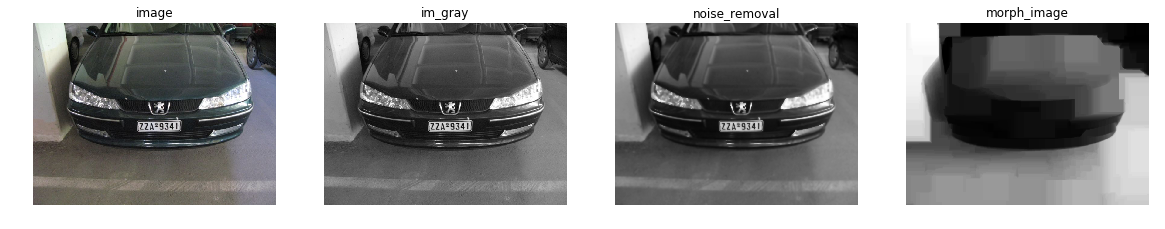

In [88]:
plt.subplots(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
plt.title("image")
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(im_gray,cmap="gray")
plt.title("im_gray")
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(noise_removal,cmap="gray")
plt.title("noise_removal")
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(morph_image,cmap="gray")
plt.title("morph_image")
plt.axis('off')


(-0.5, 799.5, 599.5, -0.5)

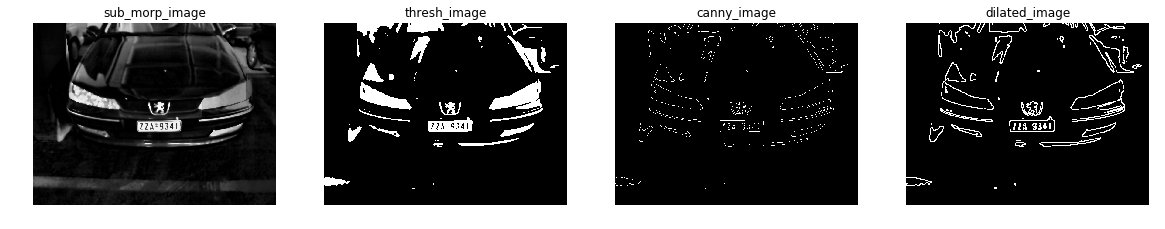

In [63]:
plt.subplots(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(sub_morp_image,cmap="gray")
plt.title("sub_morp_image")
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(thresh_image,cmap="gray")
plt.title("thresh_image")
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(canny_image,cmap="gray")
plt.title("canny_image")
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(dilated_image,cmap="gray")
plt.title("dilated_image")
plt.axis('off')

In [64]:
cv2.namedWindow('im',cv2.WINDOW_NORMAL)
cv2.imshow("im",im)
cv2.imshow("im_gray",im_gray)
cv2.imshow("noise_removal",noise_removal)
cv2.imshow("morph_image",morph_image)
cv2.imshow("sub_morp_image",sub_morp_image)
cv2.imshow("thresh_image",thresh_image)
cv2.imshow("canny_image",canny_image)
cv2.imshow("dilated_image",dilated_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [43]:
cv2.imshow("im",im)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
(x,y,w,h) = cv2.boundingRect(screenCnt)
roi = im[y:y+h,x:x+w]
roi1 = roi.copy()

(-0.5, 148.5, 37.5, -0.5)

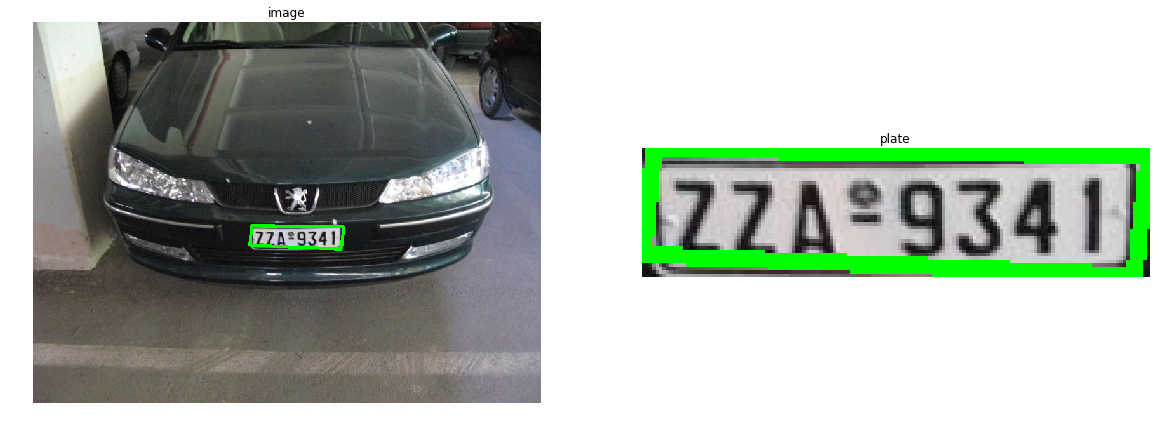

In [48]:
plt.subplots(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
plt.title("image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(roi,cmap="gray")
plt.title("plate")
plt.axis('off')




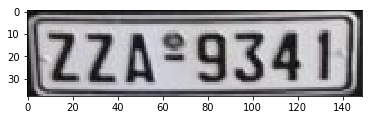

In [81]:
plt.imshow(cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

In [8]:
roi_gray = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
roi_blur = cv2.GaussianBlur(roi_gray,(3,3),1)

In [9]:
ret,thre = cv2.threshold(roi_blur,120,255,cv2.THRESH_BINARY_INV)
#cany = cv2.Canny(thre,250,255)

In [10]:
kerel3 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
thre_mor = cv2.morphologyEx(thre,cv2.MORPH_DILATE,kerel3)

In [11]:

cv2.imshow("im1",roi)
cv2.imshow("im3",thre_mor)
cv2.imshow("im2",roi1)
cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
_,cont,hier = cv2.findContours(thre_mor,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
#dr = cv2.drawContours(roi1,cont,-1,(0,255,0))

In [10]:
len(cont)

15

In [16]:
areas_ind = {}
areas = []
for ind,cnt in enumerate(cont) :
    area = cv2.contourArea(cnt)
    areas_ind[area] = ind
    areas.append(area)
    

In [17]:
areas = sorted(areas,reverse=True)[2:9]
areas 


[261.0, 215.0, 203.0, 197.5, 194.5, 184.5, 103.5]

In [121]:
#cnt = sorted(areas.items(),key = lambda x:x[1],reverse=True)

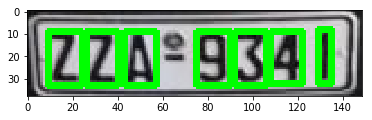

In [122]:
for i in areas:
    (x,y,w,h) = cv2.boundingRect(cont[areas_ind[i]])
    cv2.rectangle(roi,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

In [19]:
character = []
for i in areas:
    (x,y,w,h) = cv2.boundingRect(cont[areas_ind[i]])
    image = roi[y:y+h,x:x+w]
    character.append(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    cv2.imshow("im3",image)
    cv2.waitKey()
cv2.destroyAllWindows()

In [59]:
cv2.imshow("im3",roi)
cv2.waitKey()
cv2.destroyAllWindows()

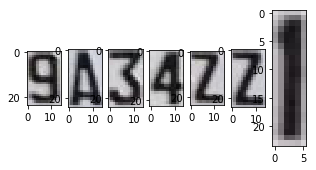

In [22]:
plt.subplots(figsize=(5,5))
plt.subplot(1,7,1)
plt.imshow(character[0])
plt.subplot(1,7,2)
plt.imshow(character[1])
plt.subplot(1,7,3)
plt.imshow(character[2])
plt.subplot(1,7,4)
plt.imshow(character[3])
plt.subplot(1,7,5)
plt.imshow(character[4])
plt.subplot(1,7,6)
plt.imshow(character[5])
plt.subplot(1,7,7)
plt.imshow(character[6])